In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [70]:
df=pd.read_excel('data.xlsx')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1019 non-null   object 
 1   price      1020 non-null   object 
 2   rating     879 non-null    float64
 3   sim        1020 non-null   object 
 4   processor  1020 non-null   object 
 5   ram        1020 non-null   object 
 6   battery    1020 non-null   object 
 7   display    1020 non-null   object 
 8   camera     1019 non-null   object 
 9   card       1013 non-null   object 
 10  os         1003 non-null   object 
dtypes: float64(1), object(10)
memory usage: 87.8+ KB


In [72]:
df.isnull().sum()

model          1
price          0
rating       141
sim            0
processor      0
ram            0
battery        0
display        0
camera         1
card           7
os            17
dtype: int64

In [73]:
df.duplicated().sum()

0

In [74]:
df.sample(5)

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
176,Xiaomi Redmi Note 11SE,"₹11,999",80.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, IR Blaster","Helio G95, Octa Core, 2.05 GHz Processor","6 GB RAM, 64 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.43 inches, 1080 x 2400 px Display with Punch...",64 MP Quad Rear & 13 MP Front Camera,"Memory Card Supported, upto 512 GB",Android v11
276,Xiaomi 12 Pro 5G,"₹50,990",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","8 GB RAM, 256 GB inbuilt",4600 mAh Battery with 120W Fast Charging,"6.73 inches, 1440 x 3200 px, 120 Hz Display wi...",50 MP + 50 MP + 50 MP Triple Rear & 32 MP Fron...,Android v12,No FM Radio
555,Realme 8,"₹15,999",78.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Helio G95, Octa Core, 2 GHz Processor","4 GB RAM, 128 GB inbuilt",5000 mAh Battery with 30W Fast Charging,"6.4 inches, 1080 x 2400 px Display with Punch ...",64 MP Quad Rear & 16 MP Front Camera,"Memory Card Supported, upto 256 GB",Android v11
960,Samsung Galaxy F42 5G (8GB RAM + 128GB),"₹22,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 700 5G, Octa Core, 2.2 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",64 MP + 5 MP + 2 MP Triple Rear & 8 MP Front C...,"Memory Card Supported, upto 1 TB",Android v11
80,Motorola Moto G72 4G,"₹15,999",83.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC","Helio G99, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card (Hybrid),Android v12


In [75]:
df["rating"].fillna(round(df["rating"].mean()),inplace=True)
df["os"].fillna(df["os"].mode(),inplace=True)
df.dropna(inplace=True)

In [76]:
df.isnull().sum().sum()

0

In [77]:
columns=df.columns
for i in columns:
    print(i,"-",df[i].nunique())

model - 1002
price - 399
rating - 30
sim - 25
processor - 289
ram - 45
battery - 244
display - 359
camera - 280
card - 61
os - 48


In [78]:
df.replace("\?","",inplace=True,regex=True)

In [79]:
#the column battery contains some data which belongs to other columns
battery_ram_shift=df[["battery"]][(~df["battery"].str.contains("Camera"))&(~df["battery"].str.contains("inches"))&(~df["battery"].str.contains("mAh"))]
battery_camera_shift=df[["battery"]][(~df["battery"].str.contains("RAM"))&(~df["battery"].str.contains("inches"))&(~df["battery"].str.contains("mAh"))]
battery_ram_shift.rename(columns={"battery":"ram"},inplace=True)
battery_camera_shift.rename(columns={"battery":"camera"},inplace=True)

In [80]:
#the column camera contains some data which belongs to other columns
camera_memory_shift=df[["camera"]][(~df["camera"].str.contains("Camera",regex=True))&(~df["camera"].str.contains("Display",regex=True))]
camera_Display_shift=df[["camera"]][(~df["camera"].str.contains("Camera",regex=True))&(~df["camera"].str.contains("Memory",regex=True))]
camera_memory_shift.rename(columns={"camera":"card"},inplace=True)
camera_Display_shift.rename(columns={"camera":"display"},inplace=True)

In [81]:
#the column card contains some data which belongs to other columns
card_os_shift=df[["card"]][(~df['card'].str.contains("Memory"))&(~df['card'].str.contains("Camera"))&(~df['card'].str.contains("Display"))]
card_camera_shift=df[["card"]][(~df['card'].str.contains("Memory"))&(~df['card'].str.contains("Android"))&(~df['card'].str.contains("Bluetooth"))&(~df['card'].str.contains("OS"))&(df['card'].str.contains("Camera"))]
card_Display_shift=df[["card"]][(~df['card'].str.contains("Memory"))&(df['card'].str.contains("Display"))]
card_camera_shift.rename(columns={"card":"camera"},inplace=True)
card_Display_shift.rename(columns={"card":"display"},inplace=True)
card_os_shift.rename(columns={"card":"os"},inplace=True)

In [82]:
#the column display contains some data which belongs to other columns
display_battery_shift=df[["display"]][(~df['display'].str.contains("Display"))&(df['display'].str.contains("Battery"))]
display_camera_shift=df[["display"]][(~df['display'].str.contains("Display"))&(df['display'].str.contains("Camera"))]
display_camera_shift.rename(columns={"display":"camera"},inplace=True)
display_battery_shift.rename(columns={"display":"battery"},inplace=True)

In [83]:
#the column os contains some data which belongs to other columns
os_card_shift=df[["os"]][df['os'].str.contains("Memory")]
os_camera_shift=df[["os"]][df['os'].str.contains("Camera")]
os_camera_shift.rename(columns={"os":"camera"},inplace=True)
os_card_shift.rename(columns={"os":"card"},inplace=True)

In [84]:
#the column processor contains some data which belongs to other columns
processor_sim_shift=df[["processor"]][(df['processor'].str.contains("No"))]
processor_sim_shift.rename(columns={"processor":"sim"},inplace=True)

In [85]:
#the column ram contains some data which belongs to other columns
ram_battery_shift=df[['ram']][(~df['ram'].str.contains("RAM"))&(df['ram'].str.contains("Battery"))]
ram_os_shift=df[['ram']][(~df['ram'].str.contains("GB"))&(df['ram'].str.contains("T"))]
ram_display_shift=df[['ram']][(df['ram'].str.contains("Display"))]
ram_sim_shift=df[['ram']][(df['ram'].str.contains("No"))]
ram_processor_shift=df[['ram']][(df['ram'].str.contains("Core"))]

In [86]:
ram_battery_shift.rename(columns={"ram":"battery"},inplace=True)
ram_display_shift.rename(columns={"ram":"display"},inplace=True)
ram_os_shift.rename(columns={"ram":"os"},inplace=True)
ram_processor_shift.rename(columns={"ram":"proessor"},inplace=True)
ram_sim_shift.rename(columns={"ram":"sim"},inplace=True)

In [87]:
#code for shifting the inappropriate data to their respective columns
df.update(battery_camera_shift)
df.update(battery_ram_shift)
df.update(processor_sim_shift)
df.update(ram_battery_shift)
df.update(ram_display_shift)
df.update(ram_os_shift)
df.update(ram_processor_shift)
df.update(ram_sim_shift)
df.update(display_battery_shift)
df.update(display_camera_shift)
df.update(camera_Display_shift)
df.update(camera_memory_shift)
df.update(card_camera_shift)
df.update(card_Display_shift)
df.update(card_os_shift)
df.update(os_camera_shift)
df.update(os_card_shift)

In [88]:
#replacing the inappropirate data with mode of that column
df["battery"]=np.where(df["battery"].str.contains("mAh"),df["battery"],df["battery"].mode())
df["card"]=np.where(df["card"].str.contains("Memory"),df["card"],df["card"].mode())
df["os"]=np.where(df["os"].str.contains("Memory"),df["os"].mode(),df["os"])
df["os"]=np.where(df["os"].str.contains("Camera"),df["os"].mode(),df["os"])
df["ram"]=np.where(df["ram"].str.contains("Display"),df["ram"].mode(),df["ram"])
df["ram"]=np.where(df["ram"].str.contains("Battery"),df["ram"].mode(),df["ram"])
df["display"]=np.where(df["display"].str.contains("Display"),df["display"],df["display"].mode())
df["processor"]=np.where(df["processor"].str.contains("No"),df["processor"].mode(),df["processor"])
df["processor"]=np.where(df["processor"].str.contains("RAM"),df["processor"].mode(),df["processor"])

In [ ]:
# battery

In [94]:
battery=df['battery'].str.split("with",expand=True).rename(columns={0:'battery_capacity', 1:'charging_capacity'})
battery['battery_capacity'].replace("mAh Battery","",inplace=True,regex=True)
battery['battery_capacity']=battery['battery_capacity'].str.strip()

In [95]:
battery['charging_capacity'].replace("W Fast Charging","",inplace=True,regex=True)
battery['charging_capacity'].replace("Fast Charging",33,inplace=True,regex=True)
battery['charging_capacity']=battery['charging_capacity'].str.strip()

In [96]:
battery['battery_capacity'].unique()

array(['5000', '3279', '4980', '4500', '3240', '4700', '4830', '4800',
       '4323', '3110', '5200', '6000', '4325', '4600', '4200', '3500',
       '3095', '4020', '3200', '4400', '4310', '4820', '3700', '5160',
       '5080', '3900', '4410', '5020', '2800', '4352', '1450', '4520',
       '4810', '4000', '2050', '2150', '4610', '5100', '7000', '4300',
       '5500', '4050', '4355', '3060', '1500', '5003', '2438', '4250',
       '3300', '4450', '4614', '4870', '4030', '4350', '4100', '21000',
       '2000', '4860', '2275', '4230', '1900', '3020', '4730', '3520',
       '4080', '2500', '5050', '5600', '4470', '3360', '3000', '2230',
       '9800', '1150', '1821', '1480', '4015', '3285', '4360', '3315',
       '1200', '3600', '3100', '22000', '2400', '1020', '4532', '1800',
       '5065', '4620', '4780', '3730', '3400', '2730', '5180', '800',
       '8000'], dtype=object)

In [97]:
battery['charging_capacity'].unique()

array(['100', '33', '15', nan, '67', '25', '120', '80', '18', '45', '10',
       '66', '44', None, '210', '30', '150', '68', '50', '20', '65',
       '180', '125', '40', '60', '200', '240', '19', '21', '135', '165',
       '22.5', '27', '55', '68.2'], dtype=object)

In [98]:
battery['charging_capacity'].fillna(33,inplace=True)

In [99]:
# camerra

In [100]:
camera=df['camera'].str.split("&",expand=True).rename(columns={0:'Rear Camera', 1:'Front Camera'})
frontCam=camera['Front Camera'].str.split("+",expand=True).rename(columns={0:'Main Camera', 1:'Additional Camera'})
frontCam['Main Camera'].replace("Front Camera","",inplace=True,regex=True)
frontCam['Main Camera'].replace({"MP":"","Dual":"","Main":16},inplace=True,regex=True)

In [102]:
frontCam['Main Camera']=frontCam['Main Camera'].str.strip()
camera['Front Camera']=frontCam['Main Camera']
camera['Rear Camera'].replace({"Triple Rear":"","MP":""},regex=True,inplace=True)
Rear_Camera=camera['Rear Camera'].str.split("+",expand=True).rename(columns={0:'Primary Camera', 1:'Secondary Camera', 2:'Additional Camera'})

In [103]:
Rear_Camera['Primary Camera'].unique()


array(['50\u2009 ', '64\u2009 ', '108\u2009 ', '12\u2009 ', '200\u2009 ',
       '200\u2009 Quad Rear ', '13\u2009 ', '48\u2009 ',
       '108\u2009 Quad Rear ', '50\u2009 Quad Rear ', '13\u2009 Rear ',
       '64\u2009 Quad Rear ', '8\u2009 Rear ', '13\u2009 Dual Rear ',
       '48\u2009 Quad Rear ', '50.3\u2009 Quad Rear ', '50.3\u2009 ',
       '8\u2009 Dual Rear ', '12.2\u2009 ', '5\u2009 Rear ',
       '5\u2009 Rear Camera', '50\u2009 Dual Rear ', '8\u2009 ',
       '12\u2009 Rear ', '200\u2009 Penta Rear ', '2\u2009 Rear Camera',
       '54\u2009 ', '16\u2009 ', '0.3\u2009 Rear Camera', '2\u2009 Rear ',
       '48\u2009  ', '12\u2009 Quad Rear ', '20\u2009 ',
       '12.2\u2009 Rear ', '1.3\u2009 Rear Camera', 'No Rear Camera',
       '16\u2009 Rear ', '13\u2009 Quad Rear ', '5\u2009 ',
       '20\u2009 Rear ', '47.2\u2009 ', '40\u2009 Quad Rear ',
       '48\u2009 Quad Rear Camera', '24\u2009 '], dtype=object)

In [104]:
Rear_Camera['Primary Camera'].replace({"Quad Rear":"","Rear":"","Rear Camera":""},regex=True,inplace=True)
Rear_Camera['Primary Camera'].replace({"Dual":"","Camera":"","Penta":"","No":0},regex=True,inplace=True)
Rear_Camera['Primary Camera']=Rear_Camera['Primary Camera'].str.strip()

In [105]:
Rear_Camera['Secondary Camera'].unique()

array([' 48\u2009 ', ' 2\u2009 ', ' 8\u2009 ', ' 12\u2009 Dual Rear ',
       ' 50\u2009 Dual Rear ', ' 2\u2009 Dual Rear ', None, ' 12\u2009 ',
       ' 13\u2009 ', ' 0.3\u2009 Dual Rear ', ' 8\u2009 Dual Rear ',
       ' 10\u2009 ', ' 50\u2009 ', ' 5\u2009 ',
       ' Depth Sensor Dual Rear ', ' 2\u2009  ', ' 5\u2009 Dual Rear ',
       ' 16\u2009 ', ' 12.2\u2009 Dual Rear ', ' Depth Sensor ',
       ' 20\u2009 ', ' 50\u2009  ', ' 16\u2009 Dual Rear ', ' 64\u2009 ',
       ' 13\u2009 Dual Rear ', ' 0.08\u2009 Dual Rear ',
       ' 1.9\u2009 Dual Rear ', ' 3\u2009 ', ' 12.2\u2009 '], dtype=object)

In [106]:
Rear_Camera['Secondary Camera'].replace({"Dual Rear":"","Depth Sensor":"","None":"0","":"0"},regex=True,inplace=True)
Rear_Camera['Secondary Camera'].unique()

array([' 48\u2009 ', ' 2\u2009 ', ' 8\u2009 ', ' 12\u2009  ',
       ' 50\u2009  ', ' 2\u2009  ', None, ' 12\u2009 ', ' 13\u2009 ',
       ' 0.3\u2009  ', ' 8\u2009  ', ' 10\u2009 ', ' 50\u2009 ',
       ' 5\u2009 ', '   ', ' 5\u2009  ', ' 16\u2009 ', ' 12.2\u2009  ',
       '  ', ' 20\u2009 ', ' 16\u2009  ', ' 64\u2009 ', ' 13\u2009  ',
       ' 0.08\u2009  ', ' 1.9\u2009  ', ' 3\u2009 ', ' 12.2\u2009 '],
      dtype=object)

In [107]:
Rear_Camera['Secondary Camera']=Rear_Camera['Secondary Camera'].str.strip()

In [108]:
Rear_Camera['Additional Camera'].unique()

array([' 32\u2009  ', ' 2\u2009  ', None, ' 8\u2009  ', ' 12\u2009  ',
       ' 10\u2009  ', ' 50\u2009  ', ' 5\u2009  ', ' 0.3\u2009  ',
       ' 13\u2009  ', ' Ultra Wide  ', ' 48\u2009  ', ' 12\u2009  Camera',
       ' 64\u2009  ', ' 16\u2009  ', ' 12.2\u2009  ', ' Depth Sensor  '],
      dtype=object)

In [109]:
Rear_Camera['Additional Camera'].mode()


0     2   
Name: Additional Camera, dtype: object

In [110]:
Rear_Camera['Additional Camera'].replace({"Ultra Wide":2,"Depth Sensor":2,"Camera":""},regex=True,inplace=True)
Rear_Camera['Additional Camera']=Rear_Camera['Additional Camera'].str.strip()

In [111]:
storage=df['card'].str.split(",",expand=True).rename(columns={0:"type",1:"upto"})

In [112]:
storage['type'].value_counts()

Memory Card Supported        716
Memory Card (Hybrid)         157
Memory Card Not Supported    129
Name: type, dtype: int64

In [113]:
storage["upto"].unique()

array([None, ' upto 1\u2009TB', ' upto 512\u2009GB', ' upto 256\u2009GB',
       ' upto 2\u2009TB', ' upto 128\u2009GB', ' upto 32\u2009GB',
       ' upto 64\u2009GB', ' upto 1000\u2009GB', ' upto 16\u2009GB',
       ' upto 48\u2009GB'], dtype=object)

In [114]:
storage['upto']=np.where(storage['type'].str.contains("Memory Card Not Supported"),"1",storage['upto'])
storage['upto']=np.where((storage['type'].str.contains("Memory Card Supported")&(storage['upto'].isnull())),'512',storage['upto'])
storage["upto"].fillna('512',inplace=True)
storage["upto"].replace({"TB":"1000","GB":"","upto":""},regex=True,inplace=True)
storage["upto"]=storage["upto"].str.strip()

In [115]:
df["card"]=storage['upto']

In [116]:
display=df['display'].str.split(",",expand=True).rename(columns={0:"inches",1:"pixel",2:"display Hz"})
display["inches"].replace("inches","",inplace=True,regex=True)
display["inches"].unique()

array(['6.7 ', '6.59 ', '6.6 ', '6.55 ', '6.1 ', '6.67 ', '6.43 ',
       '6.72 ', '6.56 ', '6.58 ', '6.8 ', '6.51 ', '6.5 ', '6.44 ',
       '6.4 ', '6.78 ', 'Foldable Display', '6.26 ', '6.53 ', '6.73 ',
       '6.52 ', '6.14 ', '6.47 ', '6.62 ', '5 ', '6.68 ', 'Dual Display',
       '6.54 ', '4.7 ', '3.54 ', '6.9 ', '6.82 ', '6.95 ', '6.3 ',
       '6.71 ', '5.4 ', '5.42 ', '6.36 ', '6 ', '6.81 ', '5.45 ', '6.2 ',
       '6.83 ', '5.7 ', '2.4 ', '6.49 ', '5.9 ', '7.92 ', '6.18 ', '4.5 ',
       '5.5 ', '6.74 ', '2.8 ', '6.35 ', '6.66 ', '6.64 ', '6.28 ',
       '6.92 ', '1.8 ', '6.76 ', '6.57 ', '6.91 ', '6.38 ', '6.06 ', '7 ',
       '6.39 ', '6.22 ', '5.3 ', '5.84 ', '6.34 ', '6.09 ', '5.2 ',
       '6.75 ', '5.86 '], dtype=object)

In [118]:
display["inches"]=np.where(display["inches"].str.contains("Display"),display["inches"].mode(),display["inches"])
display["inches"]=display["inches"].str.strip()


In [119]:
display['pixel'].isnull().sum()

15

In [120]:
display['pixel'].mode()

0     1080 x 2400 px
Name: pixel, dtype: object

In [121]:
display['pixel'].fillna("1080x2400px",inplace=True)


In [122]:
display['pixel'][display['pixel'].str.contains("Display")].value_counts()


 720 x 1600 px Display with Water Drop Notch     108
 1080 x 2400 px Display with Punch Hole           50
 1080 x 2408 px Display with Water Drop Notch     20
 1080 x 2340 px Display with Water Drop Notch     16
 Dual Display                                     15
                                                ... 
 640 x 960 px Display                              1
 720 x 1600 px Display with Small Notch            1
 750 x 1334 px Display with Large Notch            1
 720 x 1600 px Display with Large Notch            1
 720 x 1520 px Display with Large Notch            1
Name: pixel, Length: 72, dtype: int64

In [123]:
display['pixel'].replace({"Display with Water Drop Notch":"","Display with Punch Hole":"","Display with Small Notch":""},inplace=True,regex=True)
display['pixel'].replace({"Display with Large Notch":"","Dual Display":"","Display":""},inplace=True,regex=True)
display['pixel'].replace({"px":""},inplace=True,regex=True)
display['pixel']=display['pixel'].str.strip()
display['display Hz'].isnull().sum()

396

In [124]:
display['display Hz'].value_counts()

 120 Hz Display with Punch Hole          286
 90 Hz Display with Punch Hole           129
 90 Hz Display with Water Drop Notch      78
 144 Hz Display with Punch Hole           33
 120 Hz Display with Water Drop Notch     28
 120 Hz Display                           19
 165 Hz Display                            7
 120 Hz Display with Small Notch           5
 144 Hz Display                            5
 90 Hz Display with Small Notch            4
 90 Hz Display with Dual Punch Hole        4
 120 Hz Display with Large Notch           3
 90 Hz Display                             2
 165 Hz Display with Punch Hole            1
 144 Hz Display with Water Drop Notch      1
 240 Hz Display with Punch Hole            1
Name: display Hz, dtype: int64

In [125]:
display['display Hz'].replace({"Display with Water Drop Notch":"","Display with Punch Hole":"","Display with Small Notch":""},inplace=True,regex=True)
display['display Hz'].replace({"Display with Large Notch":"","Dual Display":"","Display":""},inplace=True,regex=True)
display['display Hz'].replace({"Hz":"","with Dual Punch Hole":""},inplace=True,regex=True)

In [126]:
display['display Hz'].mode()

0     120  
Name: display Hz, dtype: object

In [127]:
display['display Hz'].fillna("120",inplace=True)
display['display Hz']=display['display Hz'].str.strip()

In [128]:
df['model'].value_counts()

OnePlus 11 5G                1
Motorola One Fusion Plus     1
Xiaomi Redmi Note 11E 5G     1
Honor Magic 4 Pro Plus 5G    1
Tecno Spark 9T               1
                            ..
OnePlus 9 Pro                1
Xiaomi Redmi Note 11S        1
Xiaomi Redmi 9 Activ         1
Tecno Camon 19 Pro 5G        1
Samsung Galaxy M52s 5G       1
Name: model, Length: 1002, dtype: int64

In [129]:
df['model']=np.where(df['model'].str.contains("OnePlus"),'OnePlus',df['model'])
df['model']=np.where(df['model'].str.contains("Honor"),'Honor',df['model'])
df['model']=np.where(df['model'].str.contains("Xiaomi"),'Xiaomi',df['model'])
df['model']=np.where(df['model'].str.contains("Oppo"),'Oppo',df['model'])
df['model']=np.where(df['model'].str.contains("LG"),'LG',df['model'])
df['model']=np.where(df['model'].str.contains("Motorola"),'Motorola',df['model'])
df['model']=np.where(df['model'].str.contains("Tecno"),'Tecno',df['model'])
df['model']=np.where(df['model'].str.contains("Samsung"),'Samsung',df['model'])
df['model']=np.where(df['model'].str.contains("POCO"),'POCO',df['model'])
df['model']=np.where(df['model'].str.contains("Vivo"),'Vivo',df['model'])
df['model']=np.where(df['model'].str.contains("Poco"),'POCO',df['model'])
df['model']=np.where(df['model'].str.contains("Apple"),'Apple',df['model'])
df['model']=np.where(df['model'].str.contains("Nothing"),'Nothing',df['model'])
df['model']=np.where(df['model'].str.contains("Realme"),'Realme',df['model'])
df['model']=np.where(df['model'].str.contains("OPPO"),'Oppo',df['model'])
df['model']=np.where(df['model'].str.contains("POCO"),'POCO',df['model'])
df['model']=np.where(df['model'].str.contains("iQOO"),'iQOO',df['model'])
df['model']=np.where(df['model'].str.contains("Gionee"),'Gionee',df['model'])
df['model']=np.where(df['model'].str.contains("Nokia"),'Nokia',df['model'])
df['model']=np.where(df['model'].str.contains("Google"),'Google',df['model'])
df['model']=np.where(df['model'].str.contains("Huawei"),'Huawei',df['model'])
df['model']=np.where(df['model'].str.contains("Lenovo"),'Lenovo',df['model'])
df['model']=np.where(df['model'].str.contains("Infinix"),'Infinix',df['model'])
df['model']=np.where(df['model'].str.contains("Sony"),'Sony',df['model'])
df['model']=np.where(df['model'].str.contains("Lava"),'Lava',df['model'])
df['model']=np.where(df['model'].str.contains("Micromax"),'Micromax',df['model'])
df['model']=np.where(df['model'].str.contains("Asus"),'Asus',df['model'])
df['model']=np.where(df['model'].str.contains("Doogee"),'Doogee',df['model'])
df['model']=np.where(df['model'].str.contains("Nubia"),'Nubia',df['model'])
df['model']=np.where(df['model'].str.contains("Redmi"),'Redmi',df['model'])
df['model']=np.where(df['model'].str.contains("Jio"),'Jio',df['model'])
df['model']=np.where(df['model'].str.contains("itel"),'itel',df['model'])
df['model']=np.where(df['model'].str.contains("iKall"),'iKall',df['model'])
df['model']=np.where(df['model'].str.contains("Lyf"),'Lyf',df['model'])
df['model']=np.where(df['model'].str.contains("Itel"),'itel',df['model'])
df['model']=np.where(df['model'].str.contains("ZTE"),'ZTE',df['model'])
df['model']=np.where(df['model'].str.contains("Letv"),'Letv',df['model'])

In [130]:
df["model"].unique()

array(['OnePlus', 'Samsung', 'Motorola', 'Realme', 'Apple', 'Xiaomi',
       'Nothing', 'Oppo', 'Vivo', 'POCO', 'iQOO', 'Jio', 'Gionee',
       'Tecno', 'Tesla Pi Phone', 'Google', 'Infinix', 'Nokia',
       'Cola Phone', 'Letv', 'iKall', 'LeEco S1 Pro', 'Duoqin F22 Pro',
       'Lava', 'Honor', 'Nubia', 'Redmi', 'Asus', 'itel',
       'Royole FlexPai 2', 'Sony', 'Vertu Signature Touch', 'BLU F91 5G',
       'Lyf', 'Huawei', 'ZTE', 'Lenovo', 'LG', 'Eunity U1 5605N',
       'Micromax', 'Leitz Phone 2', 'CAT S22 Flip', 'DIZO Star 500',
       'BlackZone Ultra 4G', 'Doogee', 'Royole FlexPai 3 5G', 'TCL Ion X',
       'Sharp Aquos R5G', 'Blackview BV5200 Pro', 'XTouch F40 Flip'],
      dtype=object)

In [131]:
df['os'].unique()

array(['Android v13', 'Android v12', 'iOS v16', 'iOS v15', 'Android v11',
       'Android v10', 'iOS v13', 'HarmonyOS v2', 'iOS v15.0', 'iOS v14',
       'Android v10.0', 'Android v8.1 (Oreo)', 'iOS v13.0',
       'Android v11.0', 'Android v9.0 (Pie)', 'Android v12.1',
       'iOS v12.3', 'Unisoc T107', 'KAI OS', 'iOS v17',
       'Android v4.4.2 (KitKat)', 'Android v5.1 (Lollipop)',
       'Android v5.1.1 (Lollipop)', 'Hongmeng OS v3.0', 'Bluetooth',
       'Android v8.0 (Oreo)', 'T117', 'Android v6.0 (Marshmallow)',
       'Pragati OS (Powered by Android)', 'iOS v10', 'RTOS (Series 30+)',
       'iOS v14.0', 'Harmony v2.0', 'Nucleus', 'Hongmeng OS v4.0',
       'HarmonyOS v2.0', 'EMUI v12', 'HarmonyOS', 'Android v7.1 (Nougat)',
       'Android', 'Android v9 (Pie)'], dtype=object)

In [132]:
df['os']=np.where(df['os'].str.contains("Android"),'Android',df['os'])
df['os']=np.where(df['os'].str.contains("iOS"),'iOS',df['os'])
df['os']=np.where(df['os'].str.contains("HarmonyOS"),'Harmony',df['os'])
df['os']=np.where(df['os'].str.contains("Hongmeng"),'Hongmeng',df['os'])
df['os']=np.where(df['os'].str.contains("Harmony"),'Harmony',df['os'])

In [133]:
df['price'].replace(",","",regex=True,inplace=True)

In [134]:
ram=df["ram"].str.split(",",expand=True).rename(columns={0:"RAM",1:"inbuilt"})
ram['RAM'].unique()

array(['12\u2009GB RAM', '6\u2009GB RAM', '4\u2009GB RAM',
       '8\u2009GB RAM', '3\u2009GB RAM', '16\u2009GB RAM',
       '2\u2009GB RAM', '512\u2009MB RAM', '18\u2009GB RAM',
       '48\u2009MB RAM', '1\u2009GB RAM', '64\u2009GB inbuilt',
       '512\u2009GB inbuilt', '64\u2009MB RAM', '32\u2009MB RAM',
       '8\u2009MB RAM', '4\u2009MB inbuilt'], dtype=object)

In [135]:
ram['inbuilt'].isnull().sum()

4

In [136]:
ram['inbuilt']=np.where(ram['RAM'].str.contains("inbuilt"),ram['RAM'],ram['inbuilt'])

In [137]:
ram['RAM'].mode()

0    8 GB RAM
Name: RAM, dtype: object

In [140]:
ram['RAM']=np.where(ram['RAM'].str.contains("inbuilt"),"8GB RAM",ram['RAM'])
ram['RAM']=np.where(ram['RAM'].str.contains("MB"),"1GB",ram['RAM'])
ram['RAM'].replace({"RAM":"","MB":"","GB":""},regex=True,inplace=True)
ram['inbuilt']=np.where(ram['inbuilt'].str.contains("MB"),"1GB",ram['inbuilt'])
ram['inbuilt'].replace({"inbuilt":"","TB":"1000","GB":""},regex=True,inplace=True)


In [141]:
ram['inbuilt']=ram['inbuilt'].str.strip()
ram['RAM']=ram['RAM'].str.strip()

In [142]:
df.drop(columns="sim",inplace=True)

In [143]:
processor=df["processor"].str.split(",",expand=True).rename(columns={0:"type",1:"core",2:"processor Hz"})
processor['type'].value_counts()


Dimensity 700 5G      39
Helio P35             28
Snapdragon 8+ Gen1    26
Snapdragon 8 Gen2     23
Snapdragon 695        23
                      ..
Tiger T606             1
Snapdragon 615         1
Helio MT6580           1
Helio  G95             1
Google  Tensor 3       1
Name: type, Length: 255, dtype: int64

In [144]:
processor['type']=np.where(processor['type'].str.contains("Dimensity"),"Dimensity",processor['type'])
processor['type']=np.where(processor['type'].str.contains("Snapdragon"),"Snapdragon",processor['type'])
processor['type']=np.where(processor['type'].str.contains("Helio"),"Helio",processor['type'])
processor['type']=np.where(processor['type'].str.contains("Tiger"),"Tiger",processor['type'])
processor['type']=np.where(processor['type'].str.contains("Unisoc"),"Unisoc",processor['type'])
processor['type']=np.where(processor['type'].str.contains("Sanpdragon"),"Snapdragon",processor['type'])
processor['type']=np.where(processor['type'].str.contains("Bionic"),"Bionic",processor['type'])
processor['type']=np.where(processor['type'].str.contains("Google"),"Google",processor['type'])
processor['type']=np.where(processor['type'].str.contains("Apple"),"Apple",processor['type'])
processor['type']=np.where(processor['type'].str.contains("Exynos"),"Exynos",processor['type'])
processor['type']=np.where(processor['type'].str.contains("Fusion"),"Fusion",processor['type'])
processor['type']=np.where(processor['type'].str.contains("Spreadtrum"),"Spreadtrum",processor['type'])
processor['type']=np.where(processor['type'].str.contains("Kirin"),"Kirin",processor['type'])

In [145]:
processor['core'].isnull().sum()


20

In [146]:
processor['type'][processor['type'].str.contains("Core")].shape


(22,)

In [147]:
processor['core']=np.where(processor['type'].str.contains("Core"),processor['type'],processor['core'])
processor['core'].mode()

0     Octa Core
Name: core, dtype: object

In [148]:
processor['core'].fillna("Octa Core",inplace=True)

In [149]:
processor['type']=np.where(processor['type'].str.contains("Core"),"Snapdragon",processor['type'])
processor['core'].replace({"Core":"","Processor":""},inplace=True,regex=True)
processor['core']=processor['core'].str.strip()

In [150]:
processor['processor Hz'].isnull().sum()


61

In [151]:
processor['processor Hz'].mode()

0     2.2 GHz Processor
Name: processor Hz, dtype: object

In [152]:
processor['processor Hz'].fillna("2.2GHz Processor",inplace=True)
processor['processor Hz'].value_counts()

 2.2 GHz Processor     144
 2 GHz Processor       143
 2.4 GHz Processor     128
 3.2 GHz Processor      94
 2.3 GHz Processor      86
2.2GHz Processor        61
 3 GHz Processor        53
 2.84 GHz Processor     36
 2.05 GHz Processor     28
 2.5 GHz Processor      23
 1.8 GHz Processor      22
 2.85 GHz Processor     19
 3.22 GHz Processor     18
 1.6 GHz Processor      18
 3.1 GHz Processor      15
 2.6 GHz Processor      14
 2.9 GHz Processor      13
 1.82 GHz Processor     10
 2.73 GHz Processor      9
 2.8 GHz Processor       9
 3.05 GHz Processor      8
 1.3 GHz Processor       8
 2.36 GHz Processor      8
 2.65 GHz Processor      5
 2.7 GHz Processor       5
 1.5 GHz Processor       4
 1.4 GHz Processor       4
 1.1 GHz Processor       3
 2.96 GHz Processor      3
 2.86 GHz Processor      3
 3.13 GHz Processor      2
 2.35 GHz Processor      1
 2.37 GHz Processor      1
 1.99 GHz Processor      1
 1.95 GHz Processor      1
 2.1 GHz Processor       1
 1.2 GHz Processor       1
N

In [153]:
processor['processor Hz'].replace({"GHz Processor":""},regex=True,inplace=True)
processor['processor Hz']=processor['processor Hz'].str.strip()

In [154]:
Rear_Camera['Additional Camera'].mode()

0    2
Name: Additional Camera, dtype: object

In [155]:
Rear_Camera['Primary Camera'].mode()


0    50
Name: Primary Camera, dtype: object

In [156]:
Rear_Camera['Secondary Camera'].mode()


0    2
Name: Secondary Camera, dtype: object

In [157]:
Rear_Camera['Additional Camera'].fillna(2,inplace=True)
Rear_Camera['Primary Camera'].fillna(50,inplace=True)
Rear_Camera['Secondary Camera'].fillna(2,inplace=True)

In [158]:
frontCam["Main Camera"].isnull().sum()

24

In [159]:
frontCam["Main Camera"].mode()

0    16
Name: Main Camera, dtype: object

In [160]:
frontCam.drop(columns="Additional Camera",inplace=True)
frontCam['Main Camera'].fillna(16,inplace=True)

In [161]:
df=pd.concat([df,battery],axis=1)
df=pd.concat([df,Rear_Camera],axis=1)
df=pd.concat([df,frontCam],axis=1)
df=pd.concat([df,display],axis=1)
df=pd.concat([df,processor],axis=1)
df=pd.concat([df,ram],axis=1)

In [162]:
df.drop(columns=["processor","ram","battery","display","camera"],inplace=True)

In [163]:
df.columns

Index(['model', 'price', 'rating', 'card', 'os', 'battery_capacity',
       'charging_capacity', 'Primary Camera', 'Secondary Camera',
       'Additional Camera', 'Main Camera', 'inches', 'pixel', 'display Hz',
       'type', 'core', 'processor Hz', 'RAM', 'inbuilt'],
      dtype='object')

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1002 entries, 0 to 1019
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   model              1002 non-null   object 
 1   price              1002 non-null   object 
 2   rating             1002 non-null   float64
 3   card               1002 non-null   object 
 4   os                 1002 non-null   object 
 5   battery_capacity   1002 non-null   object 
 6   charging_capacity  1002 non-null   object 
 7   Primary Camera     1002 non-null   object 
 8   Secondary Camera   1002 non-null   object 
 9   Additional Camera  1002 non-null   object 
 10  Main Camera        1002 non-null   object 
 11  inches             1002 non-null   object 
 12  pixel              1002 non-null   object 
 13  display Hz         1002 non-null   object 
 14  type               1002 non-null   object 
 15  core               1002 non-null   object 
 16  processor Hz       1002 

In [172]:
df["Additional Camera"]=df["Additional Camera"].astype(float)
df["Main Camera"]=df["Main Camera"].astype(float)
df['Primary Camera']=df['Primary Camera'].astype(float)
df['RAM']=df['RAM'].astype(int)
df['Secondary Camera'].replace("","1",inplace=True)
df['Secondary Camera']=df['Secondary Camera'].astype(float)
df['battery_capacity']=df['battery_capacity'].astype(int)
# df['card']=df['card'].astype(int)
df['charging_capacity']=df['charging_capacity'].astype(float)
df['display Hz']=df['display Hz'].astype(int)
# df['inbuilt']=df['inbuilt'].astype(int)
df['inches']=df['inches'].astype(float)
# df['price']=df['price'].astype(int)
df['processor Hz']=df['processor Hz'].astype(float)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1002 entries, 0 to 1019
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   model              1002 non-null   object 
 1   price              1002 non-null   object 
 2   rating             1002 non-null   float64
 3   card               1002 non-null   object 
 4   os                 1002 non-null   object 
 5   battery_capacity   1002 non-null   int32  
 6   charging_capacity  1002 non-null   float64
 7   Primary Camera     1002 non-null   float64
 8   Secondary Camera   1002 non-null   float64
 9   Additional Camera  1002 non-null   float64
 10  Main Camera        1002 non-null   float64
 11  inches             1002 non-null   float64
 12  pixel              1002 non-null   object 
 13  display Hz         1002 non-null   int32  
 14  type               1002 non-null   object 
 15  core               1002 non-null   object 
 16  processor Hz       1002 

In [175]:
correlation_matrix=df.corr()

C:\Users\jugraj\AppData\Local\Temp\ipykernel_23916\2312581054.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df.corr()


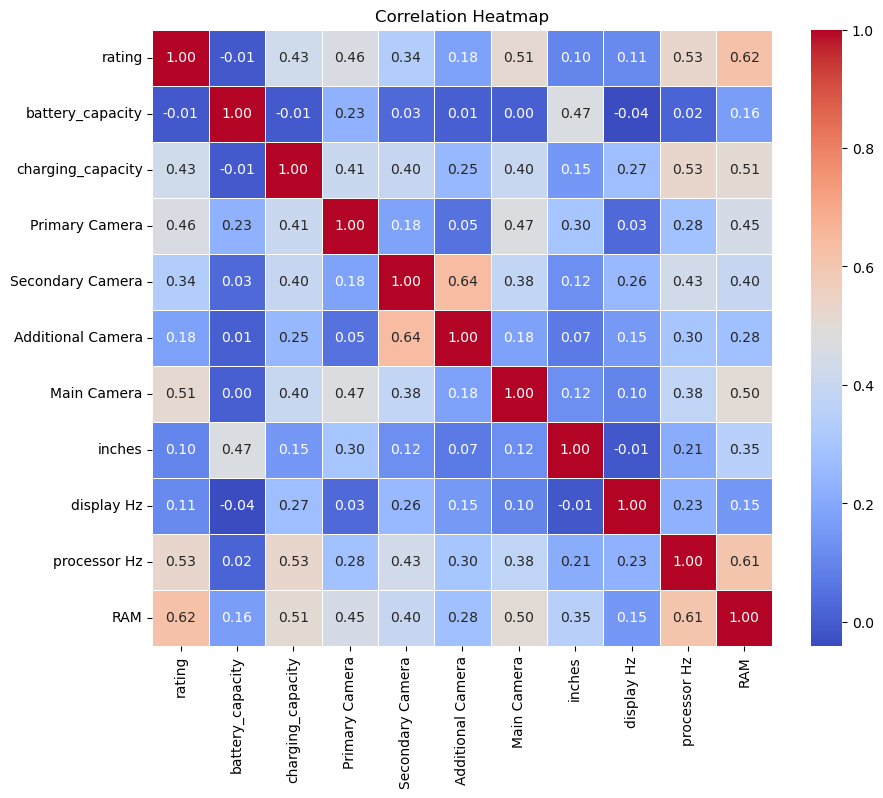

In [176]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()